
# Reconocimiento de dígitos manuscritos.

Un ejemplo de como se puede utilizar el clasificador SVM de scikit-learn para
el reconocimiento de dígitos manuscritos.


In [8]:
# Librerias cientificas estandar de Python
import matplotlib.pyplot as plt

# Importo los set de datos, el clasificador SVM y algunas metricas.
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

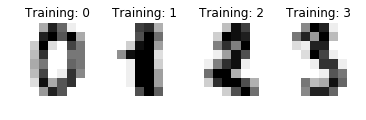

In [47]:
# Las imagenes que utilizaremos como datos son de 8x8 y representan digitos manuscritos.
# Se muestran a continuación las primeras 4 imagenes (que guardaremos en el atibuto 'images') del set de datos.
# Notar que las imagenes tienen que tener el mismo tamaño (para respetar el espacio Hilbertiano en el que se encuentran
# los datos)
# Claramente conocemos los labels de nuestro set de entrenamiento, que es un numero entero entre 0 y 9 (los guardamos en el atributo 'target')

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [24]:
# Para poder trabajar, pasamos las matrices de 8x8 con la info de las imagenes a un vector de 64 componentes (flatten)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Reporte de nuestro clasificador SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Matriz de confusión:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0

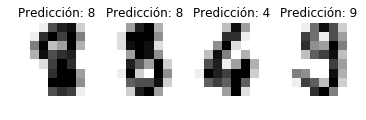

In [48]:
# Creamos el clasificador SVC
classifier = svm.SVC(gamma = 0.001)

# En este caso usamos como set de entrenamiento la primera mitad de nuestros datos.
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Ahora nos toca usar como test la segunda mitad de los digitos.
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Reporte de nuestro clasificador %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Matriz de confusión:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Predicción: %i' % prediction)

plt.show()